In [1]:
import pandas as pd
from datautils import _get_time_features,load_forecast_csv

In [2]:
#data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols,data1=load_forecast_csv("mocap",False)
data, train_slice, valid_slice, test_slice, scaler, pred_lens, data1=load_forecast_csv("phone/phone_data_20",False)

data
(7352, 20)
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       7342, 7343, 7344, 7345, 7346, 7347, 7348, 7349, 7350, 7351],
      dtype='int64', name='date', length=7352)
(7352, 20)
data
(7352, 20)
slice(None, 4411, None)
slice(4411, 5881, None)
slice(5881, None, None)
(1, 7352, 20)


/Users/katoutsubasa/ts2vec/datautils.py:140: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(f'datasets/{name}.csv', index_col='date', parse_dates=True)


In [3]:
data.shape

(1, 7352, 20)

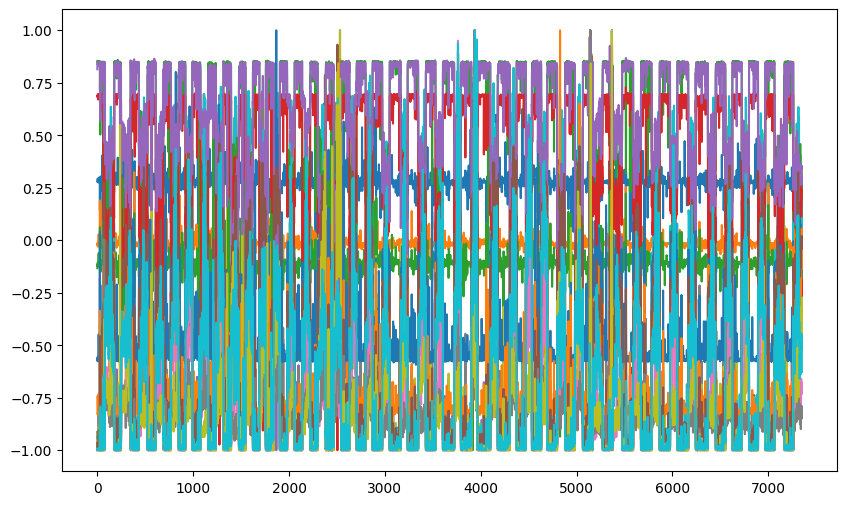

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data1)

In [5]:
data.shape[1]

7352

In [6]:
!pip install tensorflow

In [7]:
import random
import numpy as np
import torch

def torch_fix_seed(seed=42):
    # Python random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    #torch.use_deterministic_algorithms = True


torch_fix_seed()

In [8]:
data[:,:1000,:].shape

(1, 1000, 20)

In [9]:
data.shape

(1, 7352, 20)

In [10]:
from ts2vec import TS2Vec
model = TS2Vec(
    input_dims=data.shape[-1],
    length_dim=275,
    device="cpu",
    output_dims=320,
    input_total=1,
    max_train_length=300,
    #output_dims=10
)
loss_log = model.fit(
    data[:,:1000,:],
    verbose=True,
    n_iters=600,
    save_model="no_pros_k5_10.pth"
)
# from ts2vec import TS2Vec
# model = TS2Vec(
#     input_dims=data.shape[-1],
#     device="cpu",
#     output_dims=320,
#     input_total=1,
#     #output_dims=10
# )
# loss_log = model.fit(
#     data[:,:1000,:],
#     verbose=True,
#     n_iters=600,
#     save_model="no_pros_k5_10.pth"
# )

loss
tensor(62.6128, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(239.8319) tensor(533.3273)
Best model updated: loss=990.40380859375
Epoch #0: loss=990.40380859375
loss
tensor(108.0588, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(518.1887) tensor(450.2605)
Epoch #1: loss=1270.19775390625
loss
tensor(133.1124, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(660.2938) tensor(623.1208)
Epoch #2: loss=1673.2099609375
loss
tensor(29.5373, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(297.6782) tensor(228.2047)
Best model updated: loss=660.5967407226562
Epoch #3: loss=660.5967407226562
loss
tensor(60.7805, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(483.9449) tensor(271.0464)
Epoch #4: loss=966.7701416015625
loss
tensor(24.8726, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(131.2741) tensor(148.8352)
Best model updated: loss=361.0036926269531
Epoch #5: loss=361.0036926269531
loss
tensor(37.6927, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(173.8650) tensor(191.6254)
Epoch #6: los

In [11]:
model.load('no_pros_k5_10.pth')

In [12]:
all_repr = model.encode(
        data,
        causal=False,
        sliding_length=1,
        sliding_padding= 200,
        batch_size=256
    )

a


In [13]:
test_repr = all_repr[:, test_slice]
print(test_repr)

[[[-1.6569272e-02  2.3076013e-03 -1.3300411e-02 ...  1.8722117e-03
   -9.9994689e-03  1.3485327e-02]
  [-1.7102256e-02  6.7343637e-03 -9.4020069e-03 ...  2.7226135e-03
   -2.2837564e-02  8.1587434e-03]
  [-1.4481679e-02 -1.9758940e-05 -3.4986287e-03 ... -6.9380701e-03
   -1.2549780e-02  5.9284084e-03]
  ...
  [ 8.0962740e-03 -1.5249756e-02  2.6940772e-02 ... -3.8456827e-02
   -9.6482709e-03  1.5641566e-02]
  [ 4.2012557e-03 -2.3764111e-02  2.9733934e-02 ... -1.6723484e-02
    6.5055639e-03 -1.3463050e-03]
  [ 4.5085996e-03 -6.0201790e-02  2.8702915e-02 ... -9.0597719e-03
   -7.7359676e-03  1.5280526e-02]]]


In [14]:
all_repr.shape

(1, 7352, 320)

In [15]:
test_repr.shape

(1, 1471, 320)

In [16]:
test_2d = all_repr.reshape(7352, 320)
test_2d=test_2d[:1000]

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
import numpy as np
data_test=data1

In [19]:
data_test.shape
date=data_test.index
date_list=date.tolist()

In [20]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClusteringオブジェクトの作成。ここではクラスタ数を3としています。
agg_clustering = AgglomerativeClustering(n_clusters=5)

# フィッティングとラベルの予測を行います
agg_clustering.fit(test_2d)
labels = agg_clustering.labels_

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5232/3849759323.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


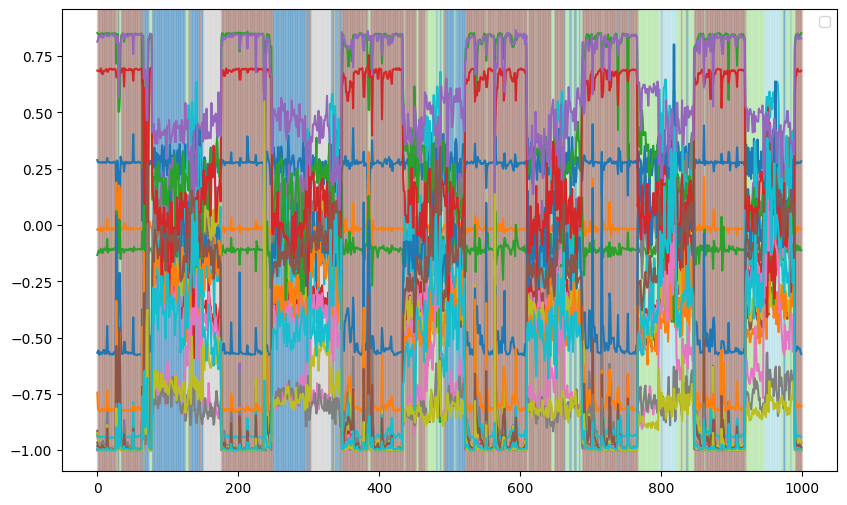

In [21]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test[:1000])  # cパラメータにクラスタラベルを渡す
#for i in range(len(date_list)-1):
for i in range(1000):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [22]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を6としています。
kmeans = KMeans(n_clusters=6)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_
print(set(labels))

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0, 1, 2, 3, 4, 5}


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5232/3849759323.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


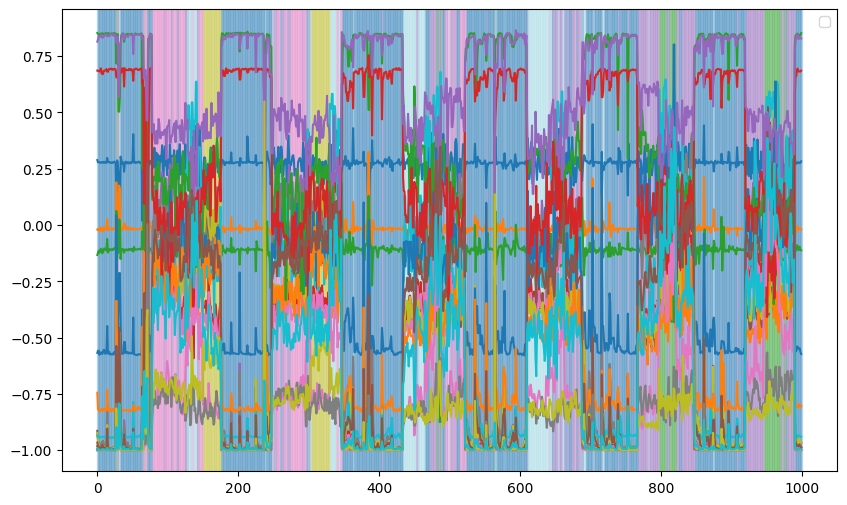

In [23]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test[:1000])  # cパラメータにクラスタラベルを渡す
#for i in range(len(date_list)-1):
for i in range(1000):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [24]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=4)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5232/3849759323.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


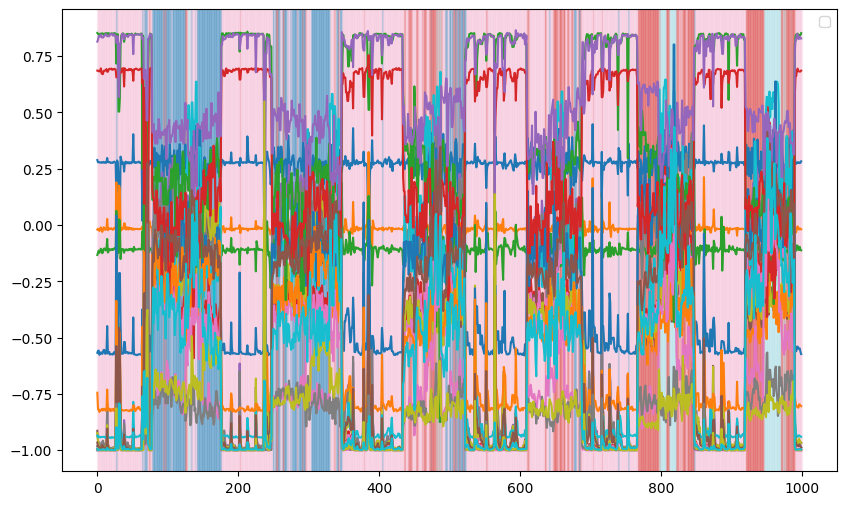

In [25]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test[:1000])  # cパラメータにクラスタラベルを渡す
#for i in range(len(date_list)-1):
for i in range(1000):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [26]:
# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=3)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5232/3849759323.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


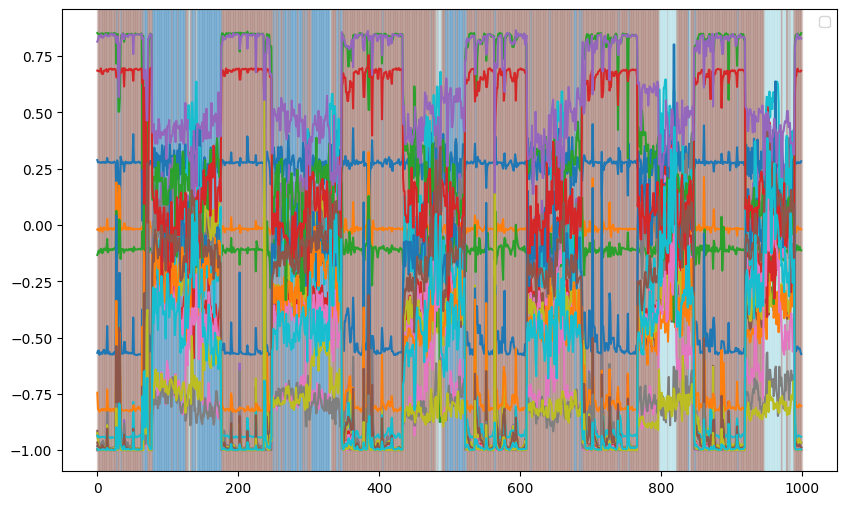

In [27]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test[:1000])  # cパラメータにクラスタラベルを渡す
#for i in range(len(date_list)-1):
for i in range(1000):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

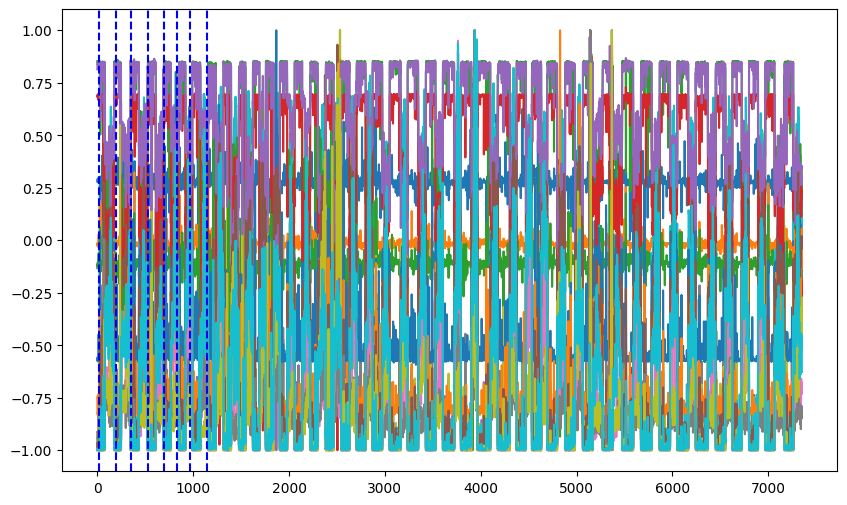

In [28]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))
plt.plot(data_test_copy) 
plt.axvline(x=19, color='b', linestyle='--')
plt.axvline(x=200, color='b', linestyle='--')
plt.axvline(x=350, color='b', linestyle='--')
plt.axvline(x=530, color='b', linestyle='--')
plt.axvline(x=700, color='b', linestyle='--')
plt.axvline(x=835, color='b', linestyle='--')
plt.axvline(x=970, color='b', linestyle='--')
plt.axvline(x=1145, color='b', linestyle='--')

41


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_5232/203972373.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


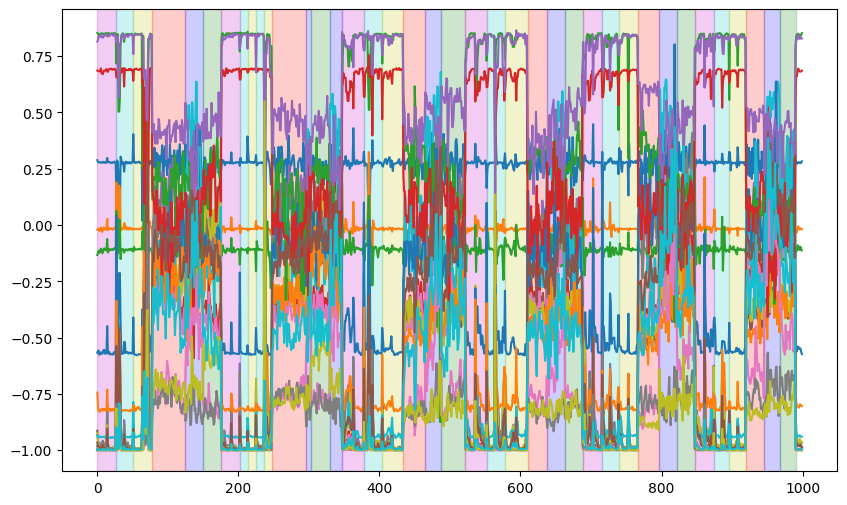

In [29]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))

regime_list=[0,27, 51, 78, 125, 150, 176, 202, 213, 225, 237, 248, 296, 303, 330, 347, 378, 404, 434, 465, 488, 522, 552, 578, 610, 637, 663, 688, 716, 739, 767, 797, 822, 847, 875, 896, 920, 946, 968, 990]
num=[5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 4.0, 6.0, 1.0, 3.0, 2.0, 3.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 5.0, 4.0, 6.0,]
#colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]
colors=[]
print(len(regime_list)+1)
for i in range(len(regime_list)+1):
    if num[i]==1:
        colors.append("r")
    elif num[i]==2:
        colors.append("g")
    elif num[i]==3:
        colors.append("b")
    elif num[i]==4:
        colors.append("c")
    elif num[i]==5:
        colors.append("m")
    elif num[i]==6:
        colors.append("y")
    else:
        colors.append("k")
plt.plot(data_test_copy[:1000]) 
num_clusters = len(set(regime_list))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
for i in range(len(regime_list)-1):
    plt.axvspan(regime_list[i], regime_list[i+1], color=colors[i], alpha=0.2)

In [30]:
from sklearn.manifold import TSNE
regime_list=[0,27, 51, 78, 125, 150, 176, 202, 213, 225, 237, 248, 296, 303, 330, 347, 378, 404, 434, 465, 488, 522, 552, 578, 610, 637, 663, 688, 716, 739, 767, 797, 822, 847, 875, 896, 920, 946, 968, 990]
# t-SNEのモデルを作成
tsne = TSNE(n_components=3, random_state = 0, perplexity = 30, n_iter = 10000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


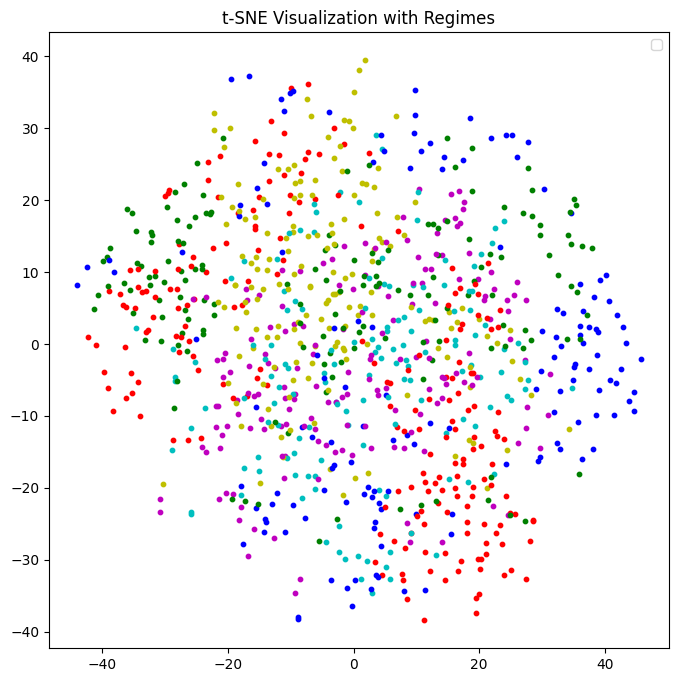

In [31]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
#regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
#colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        #label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()

In [32]:
# from sklearn.manifold import TSNE
# regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 15000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


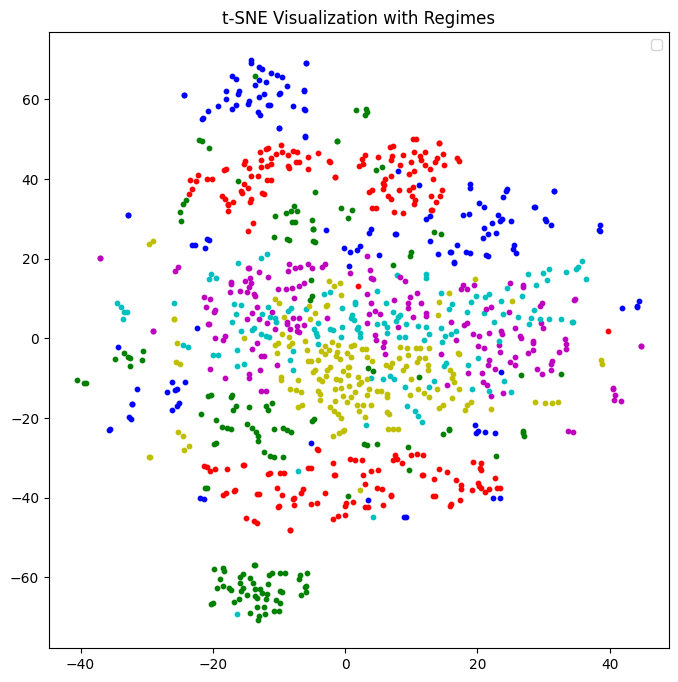

In [33]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
# regime_label=[0,1,2,3,4,1,2,3,4,5]

# # 各regimeごとに色を指定
# colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        #label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()